# TITANIC - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")
gender_df=pd.read_csv("gender_submission.csv")

test_PassengerId=test_df["PassengerId"]


In [3]:
test_df1=test_df.copy()
train_df1=train_df.copy()
gender_df1=gender_df.copy()

In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Column Names

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
gender_df.columns

Index(['PassengerId', 'Survived'], dtype='object')

## Variable Description

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Total rows and columns

In [14]:
test_df.shape

(418, 11)

In [15]:
train_df.shape

(891, 12)

In [16]:
gender_df.shape

(418, 2)

## Total Passenger

In [17]:
test_df.shape[0] + train_df.shape[0] 

1309

## Describe - Data Types

In [18]:
test_df.describe()  # for numeric data types

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


There are 418 rows in test dataframe. For  this reason, Age and Fare have missing values

In [19]:
train_df.describe()   # for numeric data types

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 rows in train dataframe. For  this reason, Age has missing value

In [20]:

gender_df.describe()   # for numeric data types

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


There  is no missing value

In [21]:
test_df.describe(include=['O'])  # for object data types

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Carrau, Mr. Jose Pedro",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Cabin has missing values

In [22]:
#number of men= 266
print("number of women=" ,418-266)

number of women= 152


In [23]:
train_df.describe(include=['O'])    # for object data types

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watson, Mr. Ennis Hastings",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Cabin and Embarked have missing values

In [24]:
# number of men= 577
print("number of women=" ,891-577)

number of women= 314


## Combining

In [25]:
train_gen_df=pd.concat([train_df, gender_df])
train_gen_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,1306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,1307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_gen_df.isnull().sum()

PassengerId       0
Survived          0
Pclass          418
Name            418
Sex             418
Age             595
SibSp           418
Parch           418
Ticket          418
Fare            418
Cabin          1105
Embarked        420
dtype: int64

In [27]:
test_gen_df=pd.merge(gender_df, test_df, how="right", on=["PassengerId"])
test_gen_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
test_gen_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
all_df = pd.concat([train_df, test_gen_df])
all_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
all_df.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Describe - Data Types

In [31]:
all_df.describe()  # numeric data types

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [33]:
all_df.describe(include=['O']) #object data types

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [34]:
all_df.describe(include=["object"]).T #object data types, Tranpose

,count,unique,top,freq
Name,1309,1307,"Kelly, Mr. James",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


## Categorical Variable

In [35]:
all_df["Survived"].value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [36]:
all_df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [37]:
all_df["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [38]:
all_df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [39]:
all_df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [40]:
all_df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

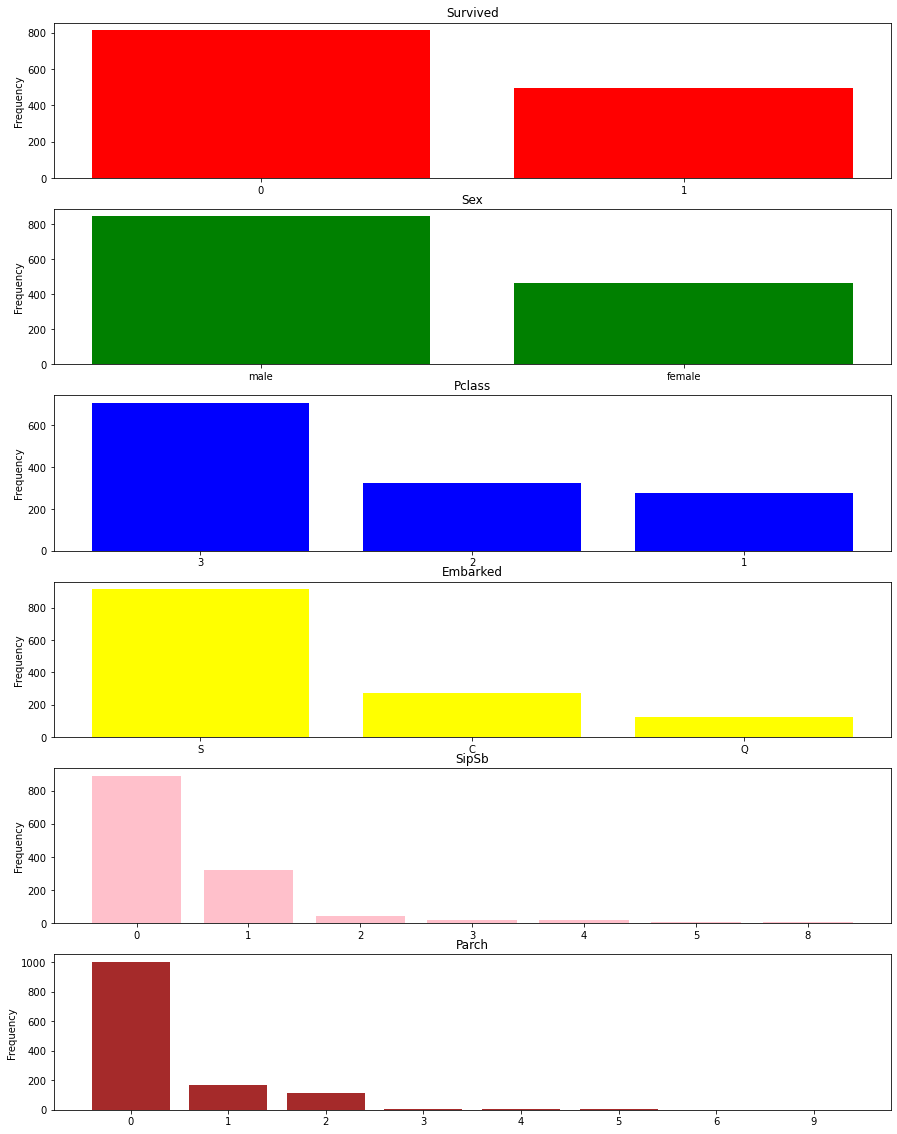

In [41]:
plt.figure(figsize=(15,20))

plt.subplot(6,1,1)
plt.bar(x = ["0","1"], height = all_df["Survived"].value_counts(), color="red")
plt.ylabel("Frequency")
plt.title("Survived")

plt.subplot(6,1,2)
plt.bar(x = ["male","female"], height = all_df["Sex"].value_counts(), color="green")
plt.ylabel("Frequency")
plt.title("Sex")

plt.subplot(6,1,3)
plt.bar(x = ["3","2","1"], height = all_df["Pclass"].value_counts(), color="blue")
plt.ylabel("Frequency")
plt.title("Pclass")

plt.subplot(6,1,4)
plt.bar(x = ["S","C","Q"], height = all_df["Embarked"].value_counts(), color="yellow")
plt.ylabel("Frequency")
plt.title("Embarked")

plt.subplot(6,1,5)
plt.bar(x = ["0","1","2","3","4","5","8"], height = all_df["SibSp"].value_counts(), color="pink")
plt.ylabel("Frequency")
plt.title("SipSb")

plt.subplot(6,1,6)
plt.bar(x = ["0","1","2","3","4","5","6","9"], height = all_df["Parch"].value_counts(), color="brown")
plt.ylabel("Frequency")
plt.title("Parch")
    
plt.show()

### Second Method

In [42]:
def graph1(variable):               
    #get feature
    var1=all_df[variable]
    
    #count number of categorical variable(value)
    var1_value=var1.value_counts()
    
    
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var1_value.index, var1_value, color="darkblue")
    plt.xticks=(var1_value.index, var1_value.index.values)
    plt.ylabel("Frequency")
    plt.title("{}".format(variable))
    
    plt.show()
  



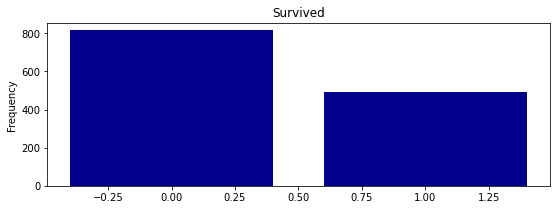

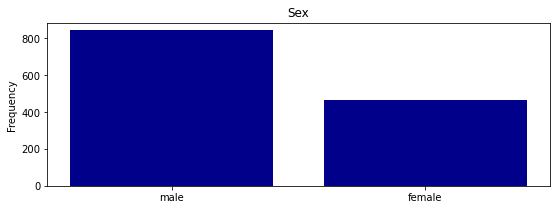

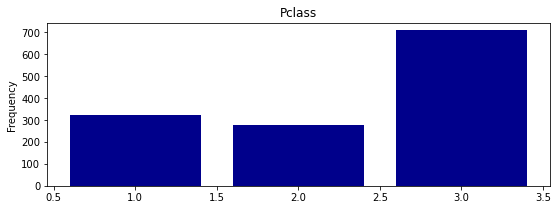

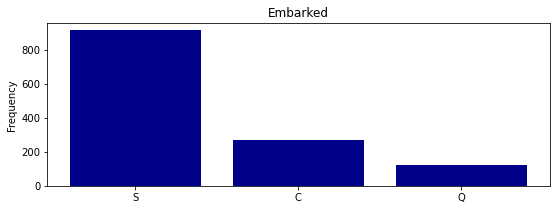

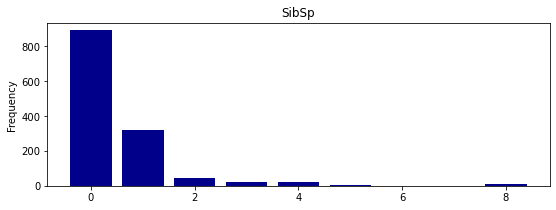

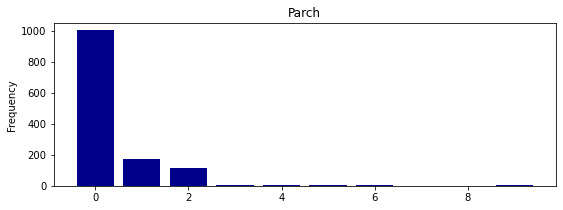

In [43]:
category1=["Survived","Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for x in category1:
    graph1(x)

## Missing Value

In [44]:
test_df.columns[test_df.isna().any()]

Index(['Age', 'Fare', 'Cabin'], dtype='object')

Age, Fare and Cabin include missing values

In [45]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age has 86 misisng values / Cabin has 327 missing values / Fare has 1 missing value

In [46]:
train_df.columns[train_df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

Age, Cabin and Embarked have missing values

In [47]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has 177 missing values / Cabin has 687 missing values / Embarked has 2 missing values

In [48]:
gender_df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

There  is no missing value

In [49]:
all_df.columns[all_df.isna().any()]

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [50]:
all_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Percentage of Missing Value

In [51]:
test_df.isnull().sum()*100/test_df.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Percentage of missing value for Age: 20.57% and Cabin: 78.23%

In [52]:
train_df.isnull().sum()*100/train_df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Percentage of missing value for Age: 19.87% , Cabin: 77.1% and Embarked: 0.22%

In [53]:
gender_df.isnull().sum()*100/gender_df.shape[0]

PassengerId    0.0
Survived       0.0
dtype: float64

There is no missing value

In [53]:
all_df.isnull().sum()*100/all_df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

Percentage of missing value for Age: 20% , Fare: 0.07% , Cabin: 77.5% and  Embarked: 0.15%

## Filling Missing Values in a Categorical Variable

In [55]:
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

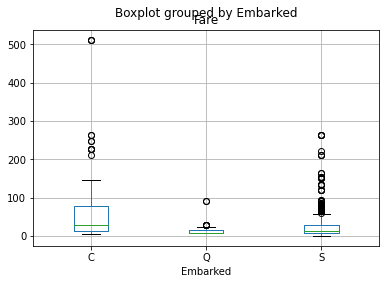

In [57]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show

In [58]:
emb_fare_agg=train_df.groupby("Embarked").aggregate({"Fare":["mean"]})
emb_fare_agg

,Fare
,mean
Embarked,
C,59.954144
Q,13.276030
S,27.079812


Fare is 80.0 for missing values in embarked. The average fare of port c is more suitable for 80 fare

In [59]:
train_df1["Embarked"]=train_df1["Embarked"].fillna("C")

In [60]:
train_df1["Embarked"].isnull().sum()

0

In [61]:
train_df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [62]:
train_df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
all_df1 = pd.concat([train_df1, test_gen_df])

In [64]:
all_df1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [65]:
all_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


## Numerical Variable

In [66]:
def hist_graph(variable):
    plt.figure(figsize=(10,6))
    plt.hist(all_df1[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{}".format(variable))
              
    plt.show()

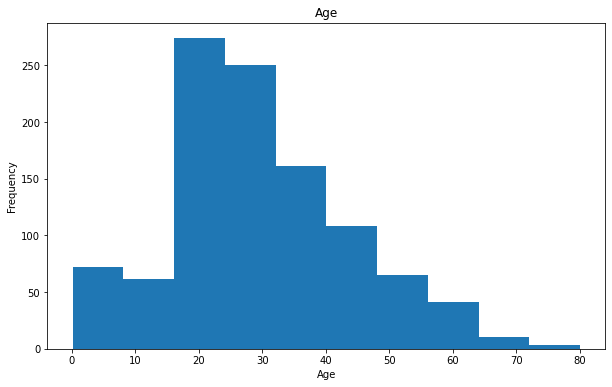

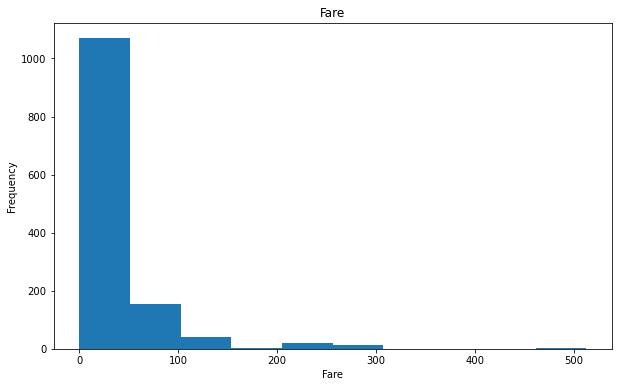

In [67]:
num_var=["Age","Fare"]
for n in num_var:
    hist_graph(n)

## Filling Missing Values in a Numerical Variable

### Fare

In [68]:
all_df1[all_df1["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Fare estimation is made according to Pclass

In [69]:
all_df1[all_df1["Pclass"]==3]["Fare"]   # Fees of those with Pclass 3

0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
412     7.7750
413     8.0500
415     7.2500
416     8.0500
417    22.3583
Name: Fare, Length: 709, dtype: float64

In [68]:
np.mean(all_df1[all_df1["Pclass"]==3]["Fare"])

13.302888700564969

This is the average price on a Pclass 3. We will fill the missinf value with this

In [70]:
all_df1["Fare"]=all_df1["Fare"].fillna(np.mean(all_df1[all_df1["Pclass"]==3]["Fare"]))

In [71]:
all_df1["Fare"].isnull().sum()

0

In [72]:
all_df1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

### Age

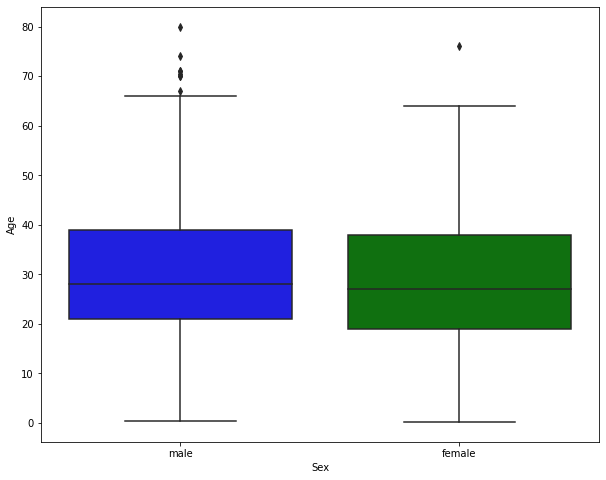

In [73]:
new_data_agg=all_df1.groupby("Sex").aggregate({"Age":["mean"]})

plt.figure(figsize=(10, 8))
sns.boxplot(x = all_df1["Sex"],  y = all_df1["Age"], data = all_df1, palette = ['blue', 'green'])

plt.show()

In [74]:
print(new_data_agg)

              Age
             mean
Sex              
female  28.687088
male    30.585228


In [75]:
all_df1["Age"]=all_df1["Age"].fillna(all_df1.groupby("Sex")["Age"].transform("mean"))
all_df1["Age"]=all_df1["Age"].fillna(all_df1["Age"].mean())

In [76]:
all_df1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [77]:
all_df1.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

Missing values were filled in with average age by gender. So the average age before and after the missing values were filled turned out to be the same

## Outliers

In [78]:

Q1=all_df1.quantile(0.25)
#print("Q1 values", Q1)

Q3=all_df1.quantile(0.75)
#print("Q3 values",  Q3)
       
IQR=Q3-Q1
#print(IQR)


lower_limit=Q1-IQR*1.5
upper_limit=Q3+IQR*1.5
print("LOWER LIMIT:\n",lower_limit)
print('-----------------------------')
print("UPPER LIMIT:\n",upper_limit)



LOWER LIMIT:
 PassengerId   -653.000
Survived        -1.500
Pclass           0.500
Age              2.500
SibSp           -1.500
Parch            0.000
Fare           -27.173
dtype: float64
-----------------------------
UPPER LIMIT:
 PassengerId    1963.0000
Survived          2.5000
Pclass            4.5000
Age              54.5000
SibSp             2.5000
Parch             0.0000
Fare             66.3438
dtype: float64


### Age

In [79]:
from scipy.stats import zscore

z_scores = zscore(all_df1["Age"])
for threshold in np.arange(1,3,0.5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold: 1.0
Number of outliers: 195
------
Threshold: 1.5
Number of outliers: 110
------
Threshold: 2.0
Number of outliers: 58
------
Threshold: 2.5
Number of outliers: 22
------


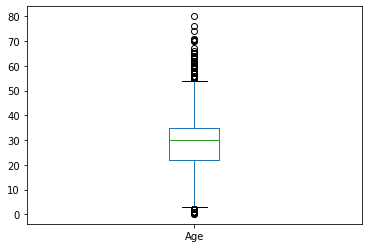

In [80]:
all_df1.Age.plot.box()
plt.show()

### SibSp

In [81]:
from scipy.stats import zscore

z_scores = zscore(all_df1["SibSp"])
for threshold in np.arange(1,3,0.5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold: 1.0
Number of outliers: 99
------
Threshold: 1.5
Number of outliers: 57
------
Threshold: 2.0
Number of outliers: 57
------
Threshold: 2.5
Number of outliers: 37
------


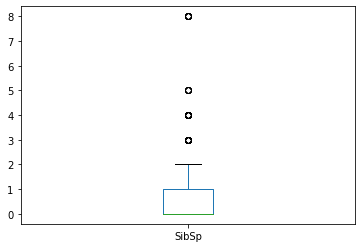

In [82]:
train_df.SibSp.plot.box()
plt.show()

### Parch

In [83]:
from scipy.stats import zscore

z_scores = zscore(all_df1["Parch"])
for threshold in np.arange(1,3,0.5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold: 1.0
Number of outliers: 137
------
Threshold: 1.5
Number of outliers: 137
------
Threshold: 2.0
Number of outliers: 24
------
Threshold: 2.5
Number of outliers: 24
------


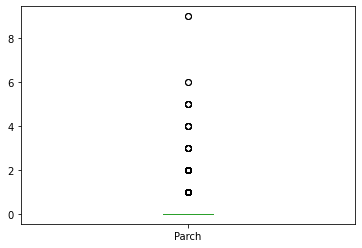

In [149]:
all_df1.Parch.plot.box()
plt.show()

### Fare

In [84]:
from scipy.stats import zscore

z_scores = zscore(all_df1["Fare"])
for threshold in np.arange(1,3,0.5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold: 1.0
Number of outliers: 100
------
Threshold: 1.5
Number of outliers: 78
------
Threshold: 2.0
Number of outliers: 56
------
Threshold: 2.5
Number of outliers: 42
------


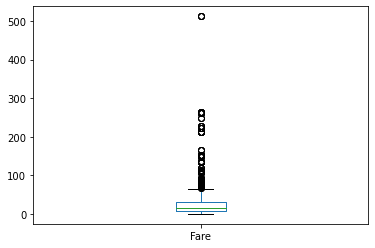

In [85]:
all_df1.Fare.plot.box()
plt.show()

### Winsorize 

### Age

In [86]:
from scipy.stats.mstats import winsorize

winsorize_data = winsorize(all_df1["Age"], (0, 0.1))

winsorize_data

masked_array(data=[22.        , 38.        , 26.        , ...,
                   38.5       , 30.58522796, 30.58522796],
             mask=False,
       fill_value=1e+20)

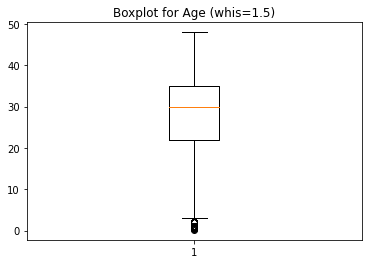

In [87]:
plt.boxplot(winsorize_data)
plt.title("Boxplot for Age (whis=1.5)")
plt.show()

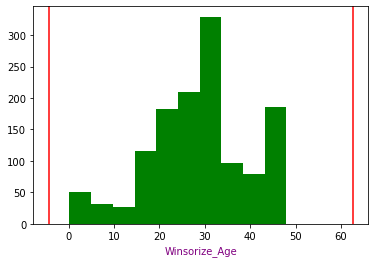

In [88]:
plt.hist(winsorize_data, color="green")
plt.axvline(x=winsorize_data.mean()+3*winsorize_data.std(),color='red')
plt.axvline(x=winsorize_data.mean()-3*winsorize_data.std(),color='red')
plt.xlabel('Winsorize_Age',color='purple')
plt.tight_layout
plt.show()

### SibSp

In [89]:
from scipy.stats.mstats import winsorize

winsorize_data2 = winsorize(all_df1["SibSp"], (0, 0.05))

winsorize_data2

masked_array(data=[1, 1, 0, ..., 0, 0, 1],
             mask=False,
       fill_value=999999,
            dtype=int64)

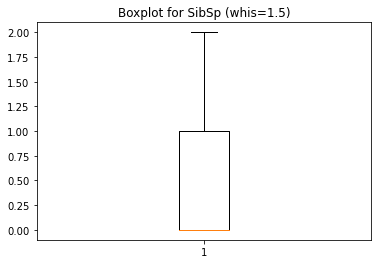

In [90]:
plt.boxplot(winsorize_data2)
plt.title("Boxplot for SibSp (whis=1.5)")
plt.show()

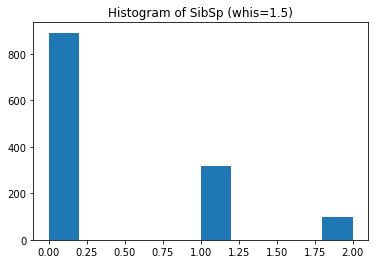

In [91]:
plt.hist(winsorize_data2)
plt.title("Histogram of SibSp (whis=1.5)")
plt.show()

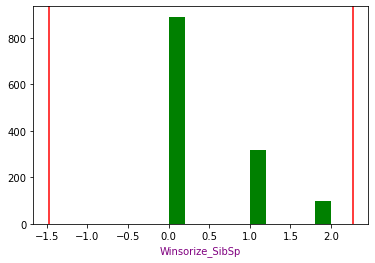

In [92]:
plt.hist(winsorize_data2, color="green")
plt.axvline(x=winsorize_data2.mean()+3*winsorize_data2.std(),color='red')
plt.axvline(x=winsorize_data2.mean()-3*winsorize_data2.std(),color='red')
plt.xlabel('Winsorize_SibSp',color='purple')
plt.tight_layout
plt.show()

### Parch

Text(0.5, 1.0, 'Parch')

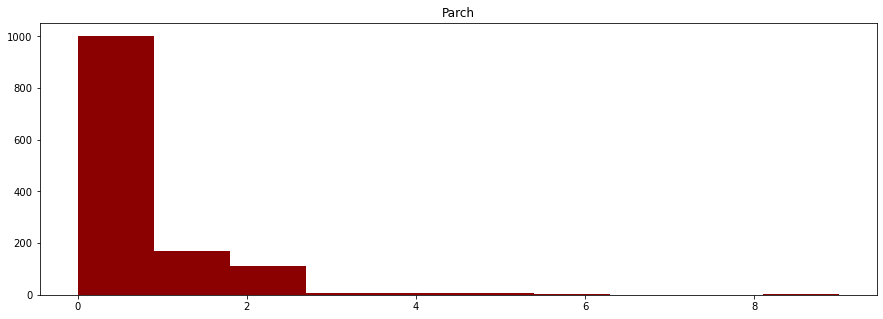

In [93]:
plt.figure(figsize = (15,5))

plt.hist(all_df1["Parch"], color="darkred")
plt.title("Parch")

In [94]:
from scipy.stats.mstats import winsorize

winsorize_data3 = winsorize(all_df1["Parch"], (0, 0.05))

winsorize_data3

masked_array(data=[0, 0, 0, ..., 0, 0, 1],
             mask=False,
       fill_value=999999,
            dtype=int64)

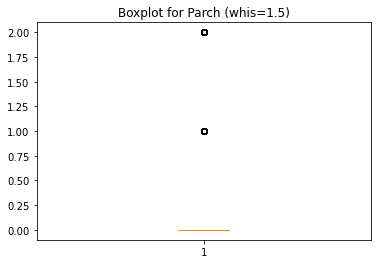

In [95]:
plt.boxplot(winsorize_data3)
plt.title("Boxplot for Parch (whis=1.5)")
plt.show()

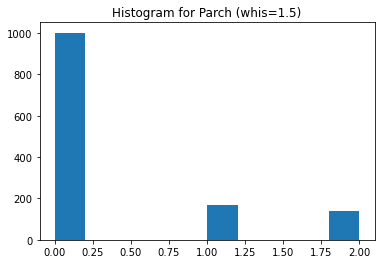

In [96]:
plt.hist(winsorize_data3)
plt.title("Histogram for Parch (whis=1.5)")
plt.show()

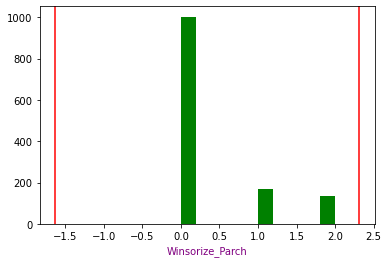

In [97]:
plt.hist(winsorize_data3, color="green")
plt.axvline(x=winsorize_data3.mean()+3*winsorize_data3.std(),color='red')
plt.axvline(x=winsorize_data3.mean()-3*winsorize_data3.std(),color='red')
plt.xlabel('Winsorize_Parch',color='purple')
plt.tight_layout
plt.show()

### Fare

Text(0.5, 1.0, 'Fare')

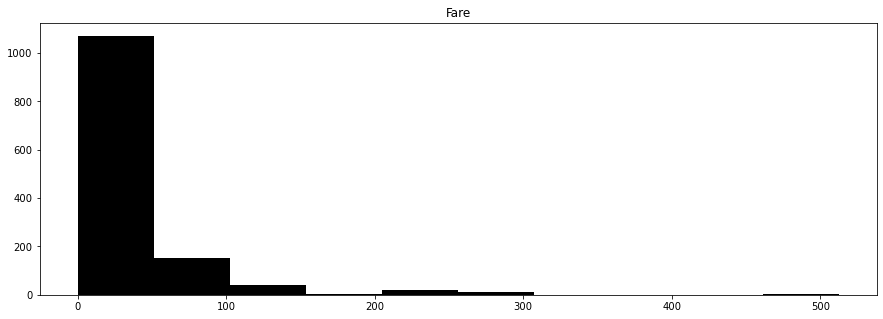

In [98]:
plt.figure(figsize = (15,5))

plt.hist(all_df1["Fare"], color="black")
plt.title("Fare")

In [99]:
from scipy.stats.mstats import winsorize

winsorize_data4 = winsorize(all_df1["Fare"], (0, 0.1))

winsorize_data4

masked_array(data=[ 7.25  , 71.2833,  7.925 , ...,  7.25  ,  8.05  ,
                   22.3583],
             mask=False,
       fill_value=1e+20)

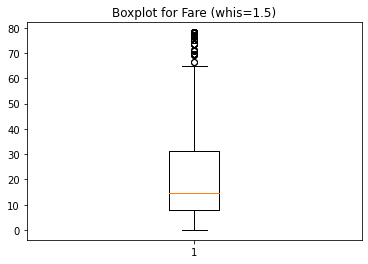

In [100]:
plt.boxplot(winsorize_data4)
plt.title("Boxplot for Fare (whis=1.5)")
plt.show()

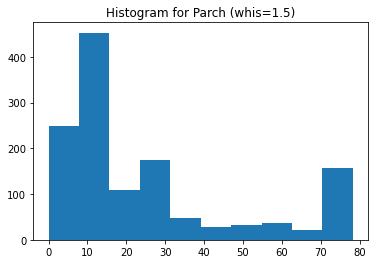

In [105]:
plt.hist(winsorize_data4)
plt.title("Histogram for Parch (whis=1.5)")
plt.show()

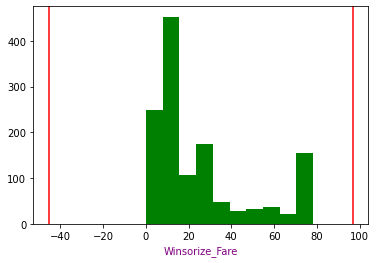

In [106]:
plt.hist(winsorize_data4, color="green")
plt.axvline(x=winsorize_data4.mean()+3*winsorize_data4.std(),color='red')
plt.axvline(x=winsorize_data4.mean()-3*winsorize_data4.std(),color='red')
plt.xlabel('Winsorize_Fare',color='purple')
plt.tight_layout
plt.show()

## Data Exploration

In [107]:
all_df1.describe() # for numeric values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.909496,0.498854,0.385027,33.280206
std,378.020061,0.484918,0.837836,12.889182,1.041658,0.865560,51.741830
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [108]:
all_df1.describe(include=['O'])  # for object values

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1309
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


### Visualization for Data Exploration

### Survived - Sex

In [109]:
all_df1.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [110]:
all_df1.Survived.value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [141]:
ss=all_df1[['Sex', 'Survived']].groupby(['Sex']).mean()
ss

,Survived
Sex,
female,0.82618
male,0.12930


percentage of survived:
    
    
female= %82.6

male= %12.9

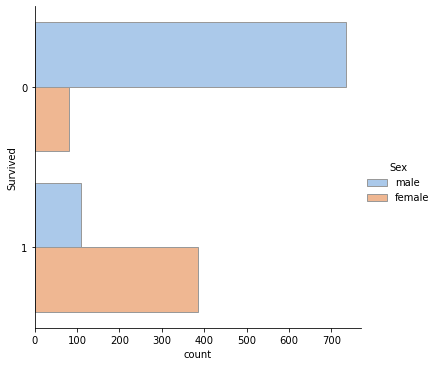

In [112]:
sns.catplot(y="Survived", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=all_df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


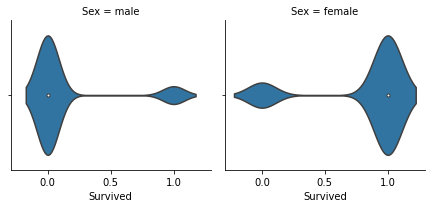

In [113]:
g = sns.FacetGrid(all_df1, col="Sex", col_wrap=6)
g.map(sns.violinplot, "Survived")

### Survived - Pclass

In [114]:
all_df1.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [115]:
all_df1[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.575851
2,0.422383
3,0.269394


percentage of survived:
    
    
1st class= %57.6

2nd class= %42.2

3rd class= %26.9

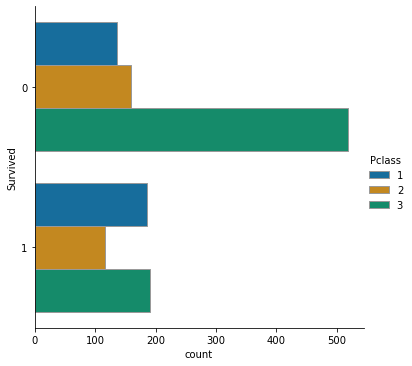

In [116]:
sns.catplot(y="Survived", hue="Pclass", kind="count",
            palette="colorblind", edgecolor=".6",
            data=all_df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

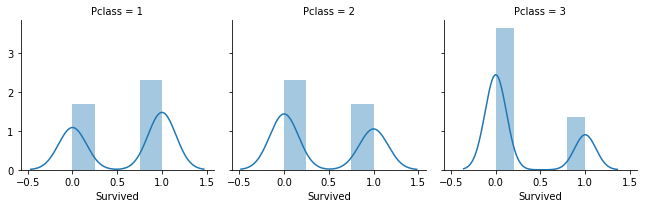

In [117]:
g = sns.FacetGrid(all_df1, col="Pclass", col_wrap=6)
g.map(sns.distplot, "Survived")

### Survived - Sex - Pclass

In [118]:
all_df1[["Sex",'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.979167
       2       0.943396
       3       0.666667
male   1       0.251397
       2       0.099415
       3       0.095335

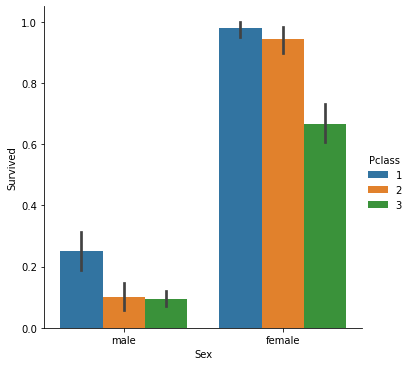

In [119]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=all_df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


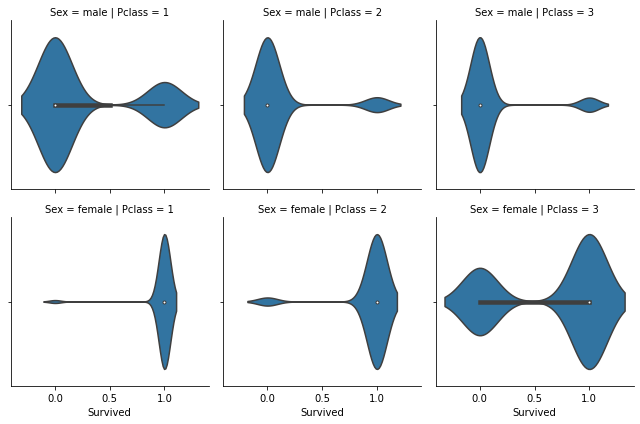

In [120]:
g = sns.FacetGrid(all_df1, row="Sex", col="Pclass")
g.map(sns.violinplot, "Survived")

### Survived - Embarked

In [121]:
all_df1.Embarked.value_counts()

S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [122]:
all_df1[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.496324
Q,0.439024
S,0.333698


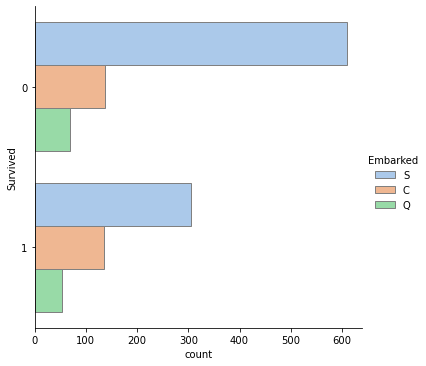

In [123]:
sns.catplot(y="Survived", hue="Embarked", kind="count",
            palette="pastel", edgecolor=".5",
            data=all_df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

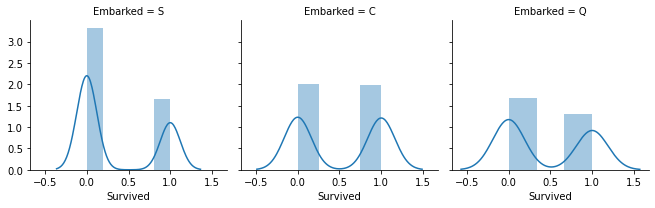

In [124]:
g = sns.FacetGrid(all_df1, col="Embarked", col_wrap=6)
g.map(sns.distplot, "Survived")

### Survived - Embarked - Sex

In [125]:
all_df1[["Sex",'Embarked', 'Survived']].groupby(['Sex', 'Embarked']).mean()

Survived
Sex    Embarked          
female C         0.921739
       Q         0.850000
       S         0.783505
male   C         0.184713
       Q         0.047619
       S         0.123596

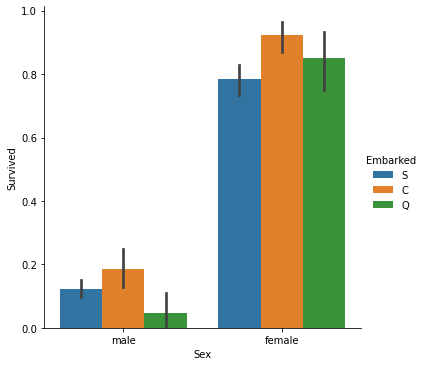

In [126]:
sns.catplot(x="Sex", y="Survived", hue="Embarked", kind="bar", data=all_df1)

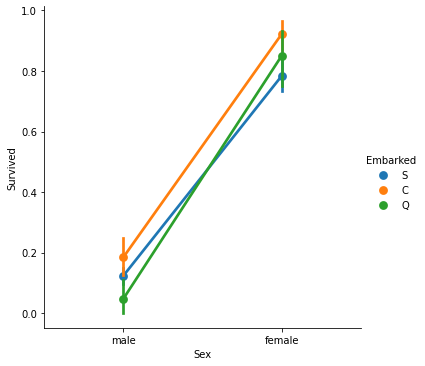

In [127]:
sns.catplot(x="Sex", y="Survived", hue="Embarked", kind="point", data=all_df1)

### Survived - Embarked - Sex - Pclass

In [128]:
all_df1[["Sex",'Embarked', 'Survived', 'Pclass']].groupby(['Sex', 'Embarked', 'Pclass']).mean()

Survived
Sex    Embarked Pclass          
female C        1       0.986301
                2       1.000000
                3       0.741935
       Q        1       1.000000
                2       1.000000
                3       0.839286
       S        1       0.971014
                2       0.935484
                3       0.573643
male   C        1       0.242857
                2       0.117647
                3       0.142857
       Q        1       0.000000
                2       0.000000
                3       0.052632
       S        1       0.259259
                2       0.100671
                3       0.092896

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


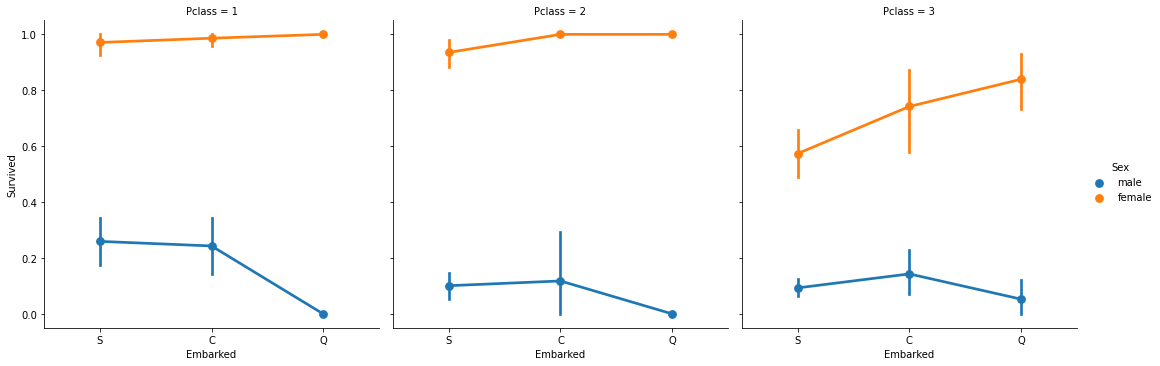

In [129]:
sns.factorplot(x='Embarked', y='Survived', hue='Sex', col='Pclass', data=all_df1)

### Survived  - SibSp

In [130]:
all_df1[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.334456
1,0.520376
2,0.452381
3,0.250000
4,0.181818
5,0.166667
8,0.111111


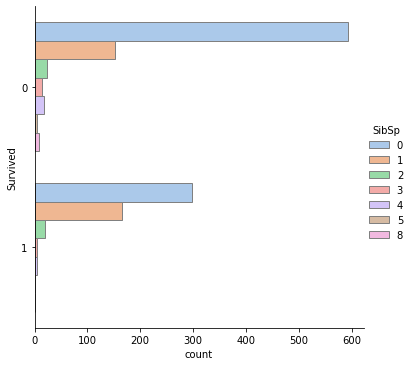

In [131]:
sns.catplot(y="Survived", hue="SibSp", kind="count",
            palette="pastel", edgecolor=".5",
            data=all_df1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


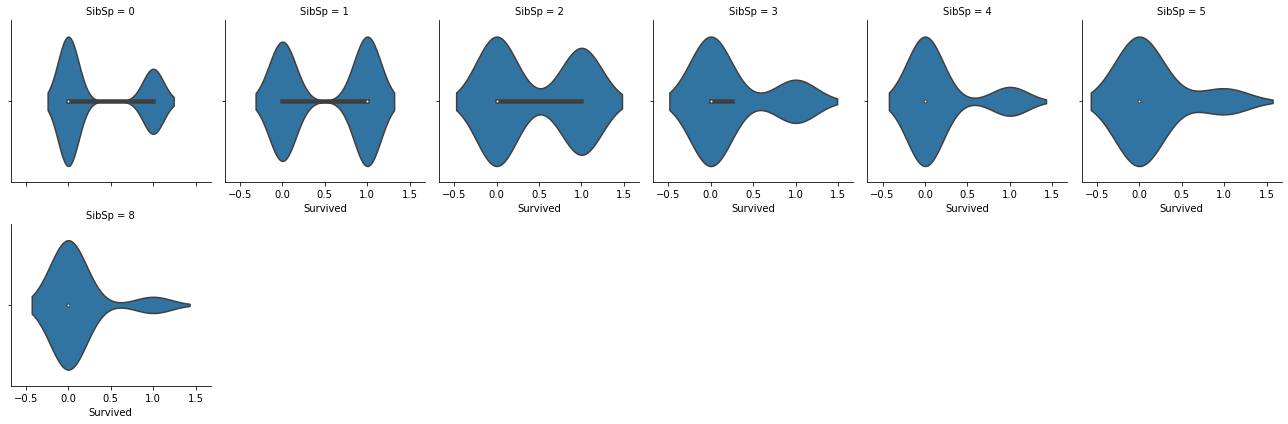

In [132]:
g = sns.FacetGrid(all_df1, col="SibSp", col_wrap=6)
g.map(sns.violinplot, "Survived")

### Survived - Parch

In [133]:
all_df1[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.331337
1,0.547059
2,0.530973
3,0.625000
4,0.333333
5,0.166667
6,0.000000
9,0.500000


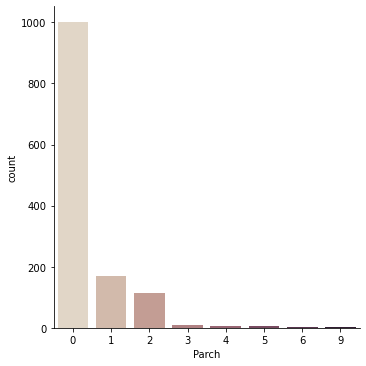

In [134]:
sns.catplot(x="Parch", kind="count", palette="ch:.25", data=all_df1)

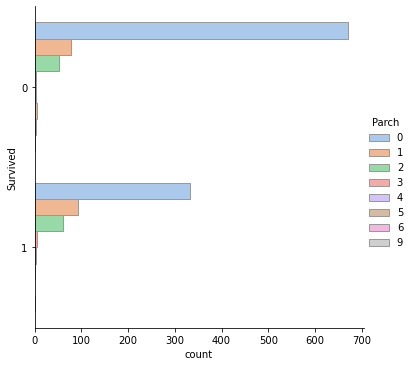

In [135]:
sns.catplot(y="Survived", hue="Parch", kind="count",
            palette="pastel", edgecolor=".6",
            data=all_df1)

### Fare - Age

In [136]:
all_df1[['Fare', 'Age']].groupby(['Age']).mean()

,Fare
Age,
0.17,20.575000
0.33,14.400000
0.42,8.516700
0.67,14.500000
0.75,17.430533
...,...
70.50,7.750000
71.00,42.079200
74.00,7.775000


Text(0, 0.5, 'Fare')

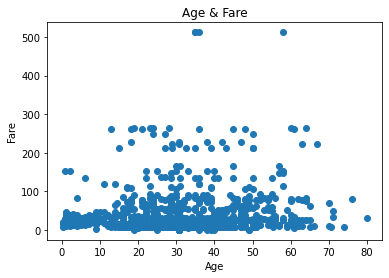

In [137]:
plt.scatter(all_df1["Age"], all_df1["Fare"])
plt.title("Age & Fare")
plt.xlabel('Age')
plt.ylabel('Fare')

### Fare - Pclass

In [139]:
all_df1[['Fare', 'Pclass']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


Text(0, 0.5, 'Fare')

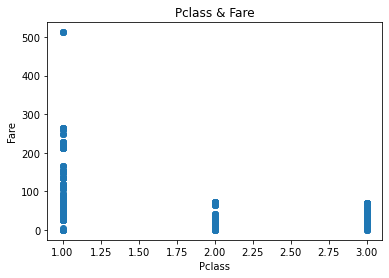

In [140]:
plt.scatter(all_df1["Pclass"], all_df1["Fare"])
plt.title("Pclass & Fare")
plt.xlabel('Pclass')
plt.ylabel('Fare')

### Survived - Age

In [120]:
all_df1[['Survived', 'Age']].groupby(['Age']).mean()

,Survived
Age,
0.17,1.000000
0.33,0.000000
0.42,1.000000
0.67,1.000000
0.75,0.666667
...,...
70.50,0.000000
71.00,0.000000
74.00,0.000000


Text(0, 0.5, 'Age')

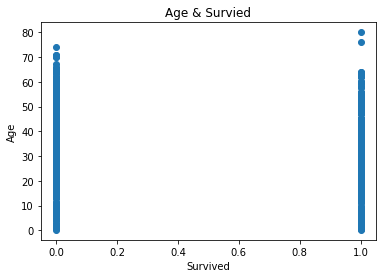

In [121]:
plt.scatter(all_df1["Survived"], all_df1["Age"])
plt.title("Age & Survied")
plt.xlabel('Survived')
plt.ylabel('Age')

### Survived - Fare

In [122]:
all_df1[['Survived', 'Fare']].groupby(['Fare']).mean()

,Survived
Fare,
0.0000,0.058824
3.1708,0.000000
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
...,...
227.5250,0.600000
247.5208,0.666667
262.3750,0.714286


Text(0, 0.5, 'Fare')

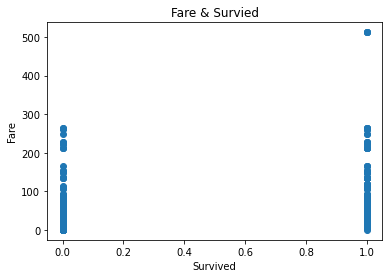

In [123]:
plt.scatter(all_df1["Survived"], all_df1["Fare"])
plt.title("Fare & Survied")
plt.xlabel('Survived')
plt.ylabel('Fare')

## T Test

### Survived - Sex

In [151]:
female_sur = all_df1[all_df1['Sex'] == "female"]['Survived']
male_sur = all_df1[all_df1['Sex'] == "male"]['Survived']

In [144]:
from scipy import stats 
stats.ttest_ind(female_sur, male_sur)

Ttest_indResult(statistic=34.30895278744665, pvalue=1.7707226157701207e-184)

P values is smaller than 0.05

### Fare - Sex

In [149]:
female_fare = all_df1[all_df1['Sex'] == "female"]['Fare']
male_fare = all_df1[all_df1['Sex'] == "male"]['Fare']

In [150]:
from scipy import stats 
stats.ttest_ind(female_fare, male_fare)

Ttest_indResult(statistic=6.832072985249874, pvalue=1.2795274700714978e-11)

P values is smaller than 0.05

## Correlation

In [145]:
all_df1_corr=all_df1.corr()
all_df1_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.026630,-0.055224,0.008942,0.031110
Survived,-0.020370,1.000000,-0.264710,-0.057705,0.002370,0.108919,0.233785
Pclass,-0.038354,-0.264710,1.000000,-0.365674,0.060832,0.018322,-0.558694
Age,0.026630,-0.057705,-0.365674,1.000000,-0.193646,-0.133645,0.169151
SibSp,-0.055224,0.002370,0.060832,-0.193646,1.000000,0.373587,0.160357
Parch,0.008942,0.108919,0.018322,-0.133645,0.373587,1.000000,0.221641
Fare,0.031110,0.233785,-0.558694,0.169151,0.160357,0.221641,1.000000


Text(0.5, 1.0, 'Correlation Matrix (Titanic)')

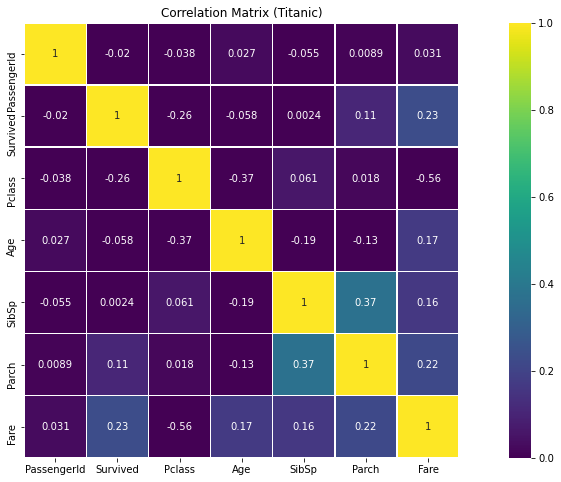

In [125]:
plt.figure(figsize=(18,8))


sns.heatmap(all_df1_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Titanic)")

Correlation is so low between features

## Feature Engineering

In [152]:
all_df2=all_df1.copy()
all_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.585228,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.585228,0,0,359309,8.0500,NaN,S


In [153]:
pd.get_dummies(all_df2["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [154]:
all_df2= pd.concat([all_df2, pd.get_dummies(all_df1["Sex"], drop_first=True)], axis=1)
all_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
